In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

# 20x CD86+CD206 P4G4 nucleus data

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8663633606308765
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8763868740004866
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8663937183608407


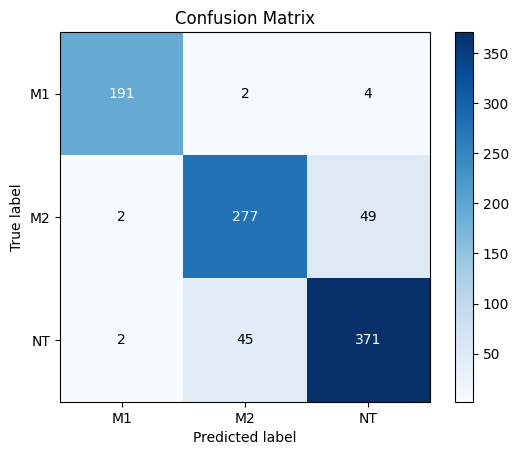

In [3]:
pipe_p4g4, test_data_p4g4 = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_p4g4, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9995236863951226
AUC score for M2 0.9647828673408685
AUC score for NT 0.9683253588516747
Average AUC 0.9775439708625552


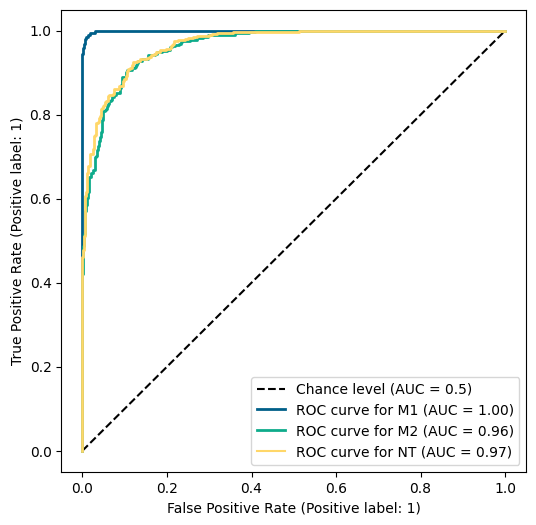

In [4]:
macrophages_analysis.make_multiclass_roc(pipe_p4g4, test_data_p4g4)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

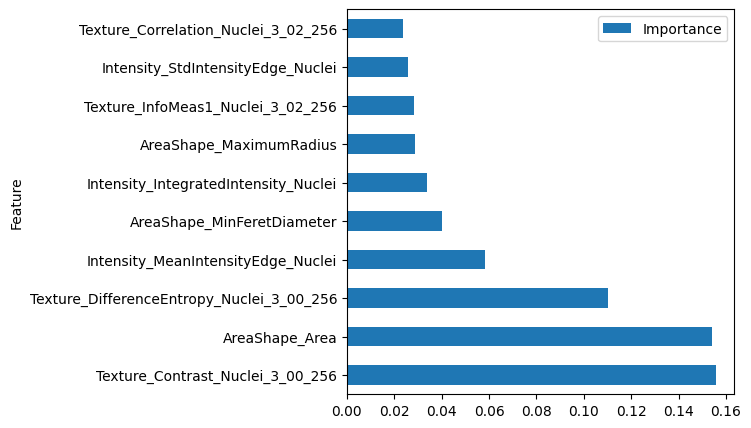

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_p4g4, nucleus_dataset_p4g4.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))   

# 20x CD86+CD206 Smooth nucleus data

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8300653594771242
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8291225217637606
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8295317473260525


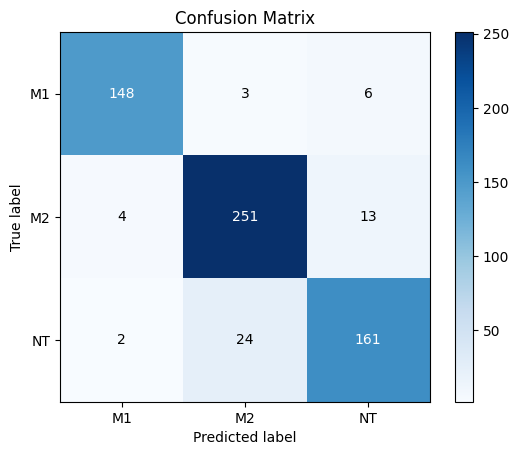

In [6]:
pipe_smooth, test_data_smooth = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_smooth, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9902148806607405
AUC score for M2 0.9786966331135023
AUC score for NT 0.9783831393519975
Average AUC 0.9824315510420801


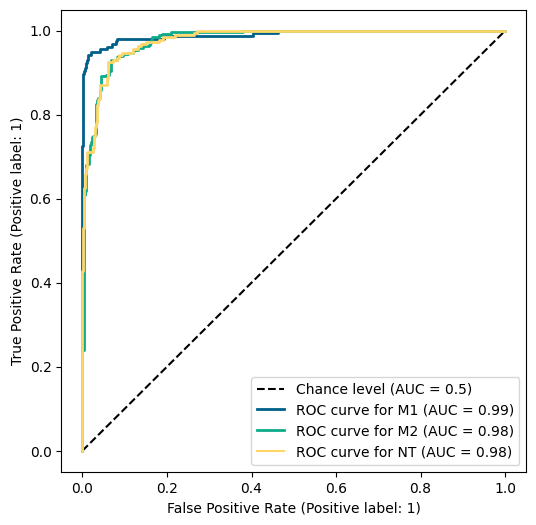

In [7]:
macrophages_analysis.make_multiclass_roc(pipe_smooth, test_data_smooth)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

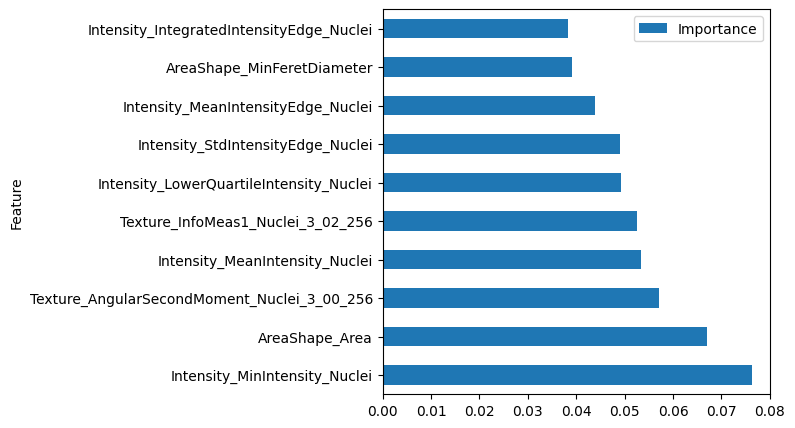

In [8]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_smooth, nucleus_dataset_smooth.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

# 20x CD86+CD206 TCPS nucleus data

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8626377648116779
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8762025828683423
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8624133570944902


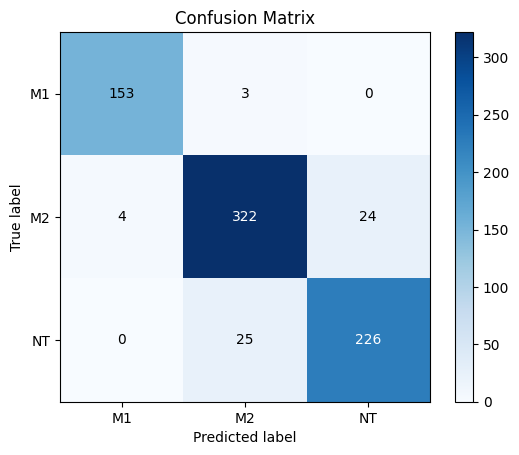

In [9]:
pipe_tcps, test_data_tcps = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_tcps, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9995306967020777
AUC score for M2 0.9798525798525799
AUC score for NT 0.9826464891422453
Average AUC 0.987343255232301


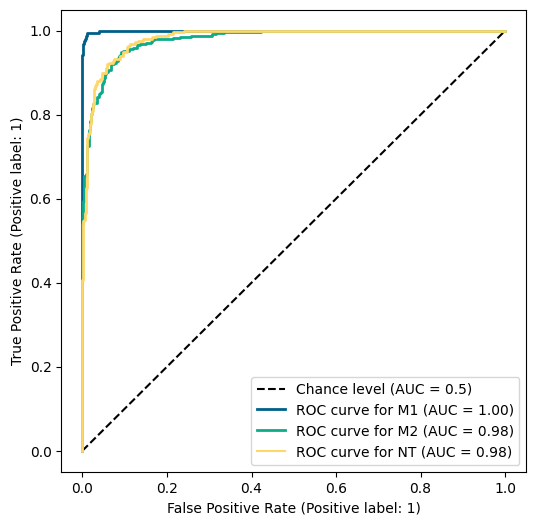

In [10]:
macrophages_analysis.make_multiclass_roc(pipe_tcps, test_data_tcps)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

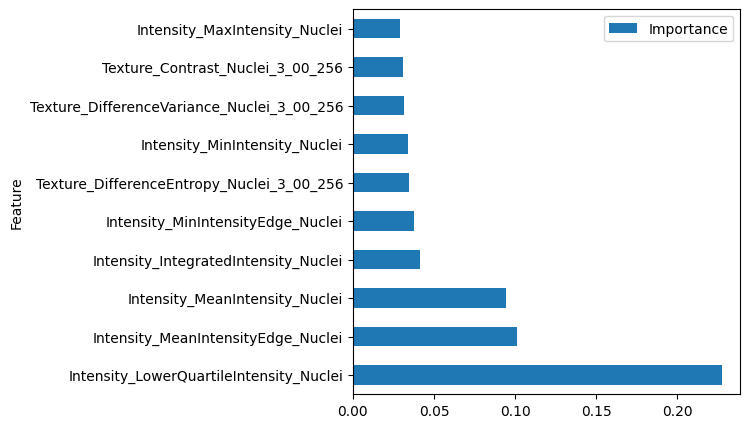

In [11]:
important_features_tcps = macrophages_analysis.get_best_features(pipe_tcps, nucleus_dataset_tcps.drop('CellType', axis=1), 10)
important_features_tcps.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))